**Analisi del file Credito**

---
<p style="color:red; font-size:18px; font-weight:bold;">
🚨 Il presente notebook è riutilizzabile al 99% con il vostro dataset. 🚨
</p>
---

Gli unici punti sui quali intervenire sono la riga di lettura del file:
- `df = pd.read_csv("Credit_ISLR.csv")`
- quando c'è menzione esplicita di colonne (in genere associato ad un argomento `columns` di un metodo oppure dentro una lista di colonne)


# Caricamenti
In questo capitolo di importano i package (se già installati) necessari al notebook:

In [10]:
import pandas as pd
import numpy as np

Caricamento dei **dati**:

In [3]:
pd.read_csv("Credit_ISLR.csv")

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Il package pandas fornisce una grafica molto buona perchè usa HTML+CSS, a differenza di python base.

Sola visualizzazione. Vogliamo ora salvare il file in un dataframe (una tabella righe e colonne)

In [11]:
df = pd.read_csv("Credit_ISLR.csv")

pandas per risparmiare spazio dello schermo e del notebook visualizza solo le prime ed ultime righe.

E' tuttavia possibile rimuovere questo filtro, nel seguente modo:

In [95]:
pd.set_option("display.max_rows", None)   # mostra tutte le righe


In [ ]:
df     # sono ora visualizzate TUTTE le 400 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Per tornare al filtro (utile la maggior parte delle volte) si fa così:

In [97]:
pd.reset_option("display.max_rows")


Vediamo la classe dell'oggetto `df`:

In [66]:
type (df)   # --.> df appartiene alla classe dei dataframe perchè è stato creato dalla funzione pandas `read_csv`

pandas.core.frame.DataFrame

Il metodo `head` visualizza le prime 5 righe:

In [27]:
df.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Il metodo `tail` visualizza le ultime 5 righe:

In [28]:
df.tail()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


Le prime due colonne sono inutili e pertanto le eliminamo con il metodo `drop`:

In [12]:
df.drop(columns=["Unnamed: 0","ID"], inplace=True)  # l'argomento 'inplace = True' rende la cancellazione delle due colonne definitiva

In [104]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Ogni riga rappresenta un cliente, descritto tramite una serie di attributi (le colonne).

Vediamo ora le dimensioni del dataframe

In [57]:
df.shape    # le dimensioni del dataframe --> 400 righe e 11 colonne

(400, 13)

L'elenco delle colonne (in formato python `list`):

In [72]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Ethnicity',
 'Balance']

In Python le **parentesi [] servono per due scopi soli**:
- subsetting (vedi più avanti)
- definizione di una lista (un oggetto appartenente alla classe `list`)

Il metodo `dtypes` (senza parentesi!) fornisce il datatype elementare delle varie colonne:

In [74]:
df.dtypes

Unnamed: 0      int64
ID              int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

> Attenzione: il data type `object` in pandas significa stringa alfanumerica.

**Data-type di pandas**<br>
Ecco i principali **data type (dtype) di pandas**.

**Numerici**

* `int64`, `int32`, `int16`, `int8`
* `float64`, `float32`, `float16`
* `complex128`, `complex64`
* `bool`

**“Nullable” di pandas (consentono `pd.NA`)**

* `Int64`, `Int32`, `Int16`, `Int8`  (attenzione: I maiuscola)
* `Float64`, `Float32` (a seconda della versione)
* `boolean`
* `string`

**Date e tempi**

* `datetime64[ns]`
* `timedelta64[ns]`
* `datetime64[ns, <tz>]` (timezone-aware)

**Testo e generici**

* `object` (storico: stringhe miste, oggetti Python)
* `category` (categorico)
* `string` (consigliato per testo “pulito”)

#**Altro (meno comune)**

* `UInt64`, `UInt32`, … (interi senza segno, nullable)
* `Sparse[...]` (dati sparsi)
* `Interval[...]` (intervalli)
* `Period[...]` (periodi, es. mensile)
* `Int64Dtype`, `StringDtype`, ecc. (le classi dtype sottostanti)

Per vedere i dtype reali di un DataFrame:

```python
df.dtypes
```

Per elencare tutti i dtype disponibili (incluse le estensioni):

```python
import pandas as pd
pd.api.types.pandas_dtype("Int64")
```


In [ ]:
df.size

Un utili sintesi del dataframe è data dal metodo `info`:
- la classe alla quale l'oggetto appartiene
- c'è un indice numerato (modificabile) creato automaticamente dalla funzione `read_csv` precedente
- l'elenco delle colonne con il numero di valori (possono esserci NA/MV) e con il data-type della colonna
- l'occupazione di memoria RAM del dataframe intero

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


Possiamo leggere anche file excel, in questo modo (senza assegnazione a un dataframe)

In [39]:
pd.read_excel("Credit_ISLR.xlsx")

,Column1,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,396,12096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


**Nota**: dove stanno questi file?
* se nella funzione `pd.read_csv` (oppure `pd.read_excel`) è riportato **solo** il nome del file (cioè senza cammino) il file deve trovarsi nella **STESSA** cartella del notebook
* è tuttavia possibile che il file da caricare NON si trovi nella cartella corrente; in questo caso occorre specificare il cammino nella funzione pandas. Ci sono due possibilità:
    - specificare il cammino assoluto del file (vedi esempio più avanti)
    - indicare un cammino relativo con queste regole di base

    ```text
        . = cartella corrente

        .. = cartella superiore

        ../altro/ = si sale e poi si scende in un’altra cartella

        subdir/file.csv = sottocartella della corrente
```

Qual è la cartella corrente del notebook? Si può vedere in questo modo:

In [30]:
%pwd       # print working directory

'c:\\Users\\Utente\\Desktop\\salvataggi\\SALVATAGGIO DATI\\Documents\\Seminari\\Data Science (corsi)\\Repository GitHub corsi\\Corso-Banca-Popolare-Puglia-Basilicata'

Se voglio sapere i contenuti della directory, per verificare la presenza del file da caricare, posso usare questo secondo comando:

In [31]:
%ls

 Il volume nell'unit� C � OS
 Numero di serie del volume: 7E81-0BB8

 Directory di c:\Users\Utente\Desktop\salvataggi\SALVATAGGIO DATI\Documents\Seminari\Data Science (corsi)\Repository GitHub corsi\Corso-Banca-Popolare-Puglia-Basilicata

16/12/2025  11:16    <DIR>          .
16/12/2025  11:16    <DIR>          ..
15/12/2025  10:13                66 .gitattributes
15/12/2025  23:03    <DIR>          Codice_calibrazione
16/12/2025  11:23            35.470 Credit.ipynb
22/04/2024  09:35            28.082 Credit_ISLR.csv
16/12/2025  11:16            45.864 Credit_ISLR.xlsx
15/12/2025  10:09    <DIR>          Excel
20/07/2010  12:53         2.451.269 FinancialIndicators.csv
10/12/2023  17:59            54.394 german_credit_data.csv
14/12/2025  13:53            16.889 Guida installazione Python (obsoleta).docx
15/12/2025  22:09            42.764 Guida Installazione.docx
15/12/2025  10:09         6.532.488 Introduzione.pptx
11/11/2021  15:38             4.737 iris.csv
12/12/2025  12:44      

Lettura del file col cammino assoluto:

In [ ]:
pd.read_excel(r"C:\Users\Utente\Desktop\salvataggi\SALVATAGGIO DATI\Documents\Seminari\Data Science (corsi)\Repository GitHub corsi\Corso-Banca-Popolare-Puglia-Basilicata\Credit_ISLR.xlsx")


# Subsetting
A volte non ci interessa leggere il dataframe nella sua interezza, ma solo alcune porzioni di righe e/o colonne (**subset**). Si fa in questo modo

In [82]:
# subsetting di RIGA
display(df[:2])      # le righe 0 e 1
display(df[5:])      # le righe dalla 5 in poi
display(df[4:7])     # le righe dalla 4 alla 5 (l'intervallo è definito come: [val-iniz, val-fin+1]

# per estrarre una SINGOLA riga occorre usare il metodo `loc`
df.loc[5]

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
5,6,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,7,20.996,3388,259,2,37,12,Female,No,No,African American,203


Unnamed: 0            6
ID                    6
Income            80.18
Limit              8047
Rating              569
Cards                 4
Age                  77
Education            10
Gender             Male
Student              No
Married              No
Ethnicity     Caucasian
Balance            1151
Name: 5, dtype: object

In [ ]:
# subsetting di colonna
display(df[["Income","Limit"]])

# definizione di lista variabili (da usare più avanti)
my_vars = ["Income","Limit"]
df[my_vars]                 # python interpreta l'UNICA dimensione subsettata come relativa alle colonne

,Income,Limit
0,14.891,3606
1,106.025,6645
2,104.593,7075
3,148.924,9504
4,55.882,4897
...,...,...
395,12.096,4100
396,13.364,3838
397,57.872,4171
398,37.728,2525


,Income,Limit
0,14.891,3606
1,106.025,6645
2,104.593,7075
3,148.924,9504
4,55.882,4897
...,...,...
395,12.096,4100
396,13.364,3838
397,57.872,4171
398,37.728,2525


In [94]:
# subsetting di riga e colonna
# più righe e più colonne
df.loc[[10, 12, 15], my_vars]

,Income,Limit
10,63.095,8117
12,80.616,5308
15,20.089,2525


# Tidy data

Bisogna lavorare in Python con dati [tidy](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), che hanno 2 caratteristiche:
- non ci sono celle multivalore, come invece la colonna *Product* della seguente tabella (che può contenere un numero indefinito di valori)<br>
![](multi_valued_cells.png)<br>
perchè le celle multi-valore sono lente da analizzare (tramite funzioni di parsing della cella)
- le unità sono sulle righe del dataframe (clienti, prodotti, i prestiti, le transazioni, ecc), gli attributi sono sulle colonne; è possibile invertire un dataframe, nel caso non sia tidy, con il metodo `T`:

In [85]:
# esempio di dataframe *non tidy* e quindi scomodo
df.T

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
ID,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
Income,14.891,106.025,104.593,148.924,55.882,80.18,20.996,71.408,15.125,71.061,...,135.118,73.327,25.974,17.316,49.794,12.096,13.364,57.872,37.728,18.701
Limit,3606,6645,7075,9504,4897,8047,3388,7114,3300,6819,...,10578,6555,2308,1335,5758,4100,3838,4171,2525,5524
Rating,283,483,514,681,357,569,259,512,266,491,...,747,472,196,138,410,307,296,321,192,415
Cards,2,3,4,3,2,4,2,2,5,3,...,3,2,2,2,4,3,5,5,1,5
Age,34,82,71,36,68,77,37,87,66,41,...,81,43,24,65,40,32,65,67,44,64
Education,11,15,11,11,16,10,12,9,13,19,...,15,15,10,13,8,13,17,12,13,7
Gender,Male,Female,Male,Female,Male,Male,Female,Male,Female,Female,...,Female,Female,Male,Male,Male,Male,Male,Female,Male,Female
Student,No,Yes,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No


# Funzioni vs metodi
E' importante distinguerli:
* una **funzione** è la classica procedura di codice presente in tutti i linguaggi, che ha degli argomenti di input e dei risultati, in genere restituiti con una *return*. Come in quasi tutti i linguaggi, esistono due tipi di funzione:
    - predefinite (built-in); ad esempio in python: `print`, `display`
    - definite dall'utente (custom o user-defined): in python si definiscono con la parola chiave `def`
* un **metodo** è invece una funzione applicabile solo agli oggetti di una certa classe. **Python è un linguaggio ad oggetti**

Sia le funzioni che i metodi hanno l'elenco dei possibili argomenti dentro le parentesi tonde.<br>
Le funzioni (sia built-in che user-defined) hanno **obbligatoriamente parentesi ed argomenti**. Al contrario, in alcuni pochi casi, i metodi (di *pandas* possono non avere (): `shape`, `size`, `dtypes`, `T`, ecc

In [62]:
# esempio di funzione definita dall'utente:
def somma(a, b):
    """Somma due numeri e restituisce il risultato."""
    return a + b

res = somma(3,2)

display(res)

5

# Valori mancanti

Ci sono valori mancanti? (celle del dataframe non valorizzate)

I valori mancanti sono spesso chiamati MV (Missing Value) oppure NA (Not Available)

In [105]:
df.isna()  # fa un test booleano cella per cella 

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


---
NB. La cella precedente è un ottimo  esempio del **funzionamento VETTORIALE** di Python, che è in grado di eleborare righe e colonne in parallelo, senza cicli for, come invece si farebbe altro linguaggio. Significa scrivere molto meno codice e più veloce.
Un altro caso classico di funzionamento vettoriale è il seguente:


In [106]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [114]:
var_num = ['Income', 'Limit', 'Rating', 'Cards', 'Age','Balance']
df[var_num].mean()


Income       45.218885
Limit      4735.600000
Rating      354.940000
Cards         2.957500
Age          55.667500
Balance     520.015000
dtype: float64

La variabile `var_num` è espressa nella sintassi [snack_case](https://it.wikipedia.org/wiki/Snake_case)

---


Se il dataframe è grande, o comunque non è visualizzato tutto, non è facile accorgersi della presenza di celle mancanti (`True`).<br>
Poichè in Python `True` è memorizzato come 1 e `False` come 0 è sufficiente fare la somma. Se essa è 0 --> non ci sono NA/MV, se è > 0, il valore della somma è il numero di NA/MV del dataframe

In [120]:
import numpy as np
np.sum(df.isna())

c:\Users\Utente\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

Vogliamo inserire qualche NA/MV per prova. Si usa Gli oggetti prima vista posso

In [121]:
df.loc[2, "Income"] = pd.NA
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,NaN,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [123]:
df.isna().sum()

Income       1
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

# Salvataggio del dataframe
Può essere che vogliamo salvare le modifiche fatte al dataframe

In [124]:
df.to_csv("Credit_ISLR_NA")

In [6]:
del (df)   # delete del dataframe

NameError: name 'df' is not defined

In [7]:
df_na = pd.read_csv("Credit_ISLR_NA")

In [8]:
df_na.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,2,NaN,7075,514,4,71,11,Male,No,No,Asian,580
3,3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# Varie

* selezione colonne per data type
* groupby
* ordinamento per colonna

In [13]:
df.select_dtypes('number')

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560
396,13.364,3838,296,5,65,17,480
397,57.872,4171,321,5,67,12,138
398,37.728,2525,192,1,44,13,0


In [14]:
df.select_dtypes('object')

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian
...,...,...,...,...
395,Male,No,Yes,Caucasian
396,Male,No,No,African American
397,Female,No,Yes,Caucasian
398,Male,No,Yes,Caucasian


In [15]:
df.select_dtypes('category')

""
0
1
2
3
4
...
395
396
397
398


In [17]:
df.groupby(by="Ethnicity")

Cosa ha fatto la cella precedente?
- `df.groupby(by='Ethnicity')` crea dei gruppi in base ai valori della colonna 'Ethnicity'
- `.count()` viene poi applicato a tutte le altre colonne numeriche, escludendo la colonna usata per il gruppo

In [18]:
df.groupby(by="Ethnicity").count()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
Ethnicity,,,,,,,,,,
African American,99,99,99,99,99,99,99,99,99,99
Asian,102,102,102,102,102,102,102,102,102,102
Caucasian,199,199,199,199,199,199,199,199,199,199


In [24]:
# ordinamento per colonna
df.sort_values("Income", ascending=True)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
58,10.354,3480,281,2,70,17,Male,No,Yes,Caucasian,333
250,10.363,2430,191,2,47,18,Female,No,Yes,Asian,0
199,10.403,4159,310,3,43,7,Male,No,Yes,Asian,571
235,10.503,2923,232,3,25,18,Female,No,Yes,African American,191
262,10.588,4049,296,1,66,13,Female,No,Yes,Caucasian,465
...,...,...,...,...,...,...,...,...,...,...,...
275,163.329,8732,636,3,50,14,Male,No,Yes,Caucasian,529
261,180.379,9310,665,3,67,8,Female,Yes,Yes,Asian,1050
355,180.682,11966,832,2,58,8,Female,No,Yes,African American,1405
323,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999


# Stili di pandas
Pandas permette di visualizzare i dataframe a colori in base al verificarsi di certe condizioni. E' un aspetto simile alla formattazione condizionata di Excel.

Il metodo `.style` di un oggetto Pandas DataFrame serve a **formattare visivamente** i dati per **migliorarne la leggibilità**, <u>senza modificarne il contenuto</u>. È molto utile quando si vuole esportare o visualizzare un DataFrame in modo più chiaro, ad esempio in un Jupyter Notebook o in un report HTML.

`df.style` restituisce un oggetto di tipo `Styler`, che permette di **applicare stili** (colori, formati numerici, gradienti, barre, ecc.) al DataFrame.

Occorre prima installare nell'ambiente virtuale (da <u>anaconda prompt e con conda!</u>) il package **Jinja2**.

In [41]:
 !conda install Jinja2 -y

3 channel Terms of Service accepted
Channels:
 - conda-forge
 - nvidia
 - rapidsai
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [ ]:
df.head().style

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891000,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025000,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593000,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924000,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882000,4897,357,2,68,16,Male,No,Yes,Caucasian,331


: 

: 

La semplice invocazione del medoto `style` di *pandas* NON visualizza nulla di differente; essa semplicemente **attiva** la modalità "stilizzazione" del DataFrame, permettendo l'aggiunta di formattazioni visive (valida solo in ambienti come Jupyter Notebook o Google Colab).

Colora valori sotto una soglia:

In [ ]:
df.select_dtypes('number').style.applymap(lambda v: 'color: red' if v > 10000 else '')     # 'applymap' applica una funzione lambda
                                                                      # funzione deprecata --> map!

C:\Users\Utente\AppData\Local\Temp\ipykernel_8892\1652610049.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.select_dtypes('number').style.applymap(lambda v: 'color: red' if v > 10000 else '')     # 'applymap' applica una funzione lambda


,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891000,3606,283,2,34,11,333
1,106.025000,6645,483,3,82,15,903
2,104.593000,7075,514,4,71,11,580
3,148.924000,9504,681,3,36,11,964
4,55.882000,4897,357,2,68,16,331
5,80.180000,8047,569,4,77,10,1151
6,20.996000,3388,259,2,37,12,203
7,71.408000,7114,512,2,87,9,872
8,15.125000,3300,266,5,66,13,279
9,71.061000,6819,491,3,41,19,1350


: 

: 

Barre orizzontalli nelle celle:

In [ ]:
display(df.head().style.bar(subset=['Income'], color='lightblue'))
df.head().style.bar(subset=['Balance', 'Rating'], color='#d65f5f')

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891000,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025000,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593000,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924000,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882000,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891000,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025000,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593000,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924000,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882000,4897,357,2,68,16,Male,No,Yes,Caucasian,331


: 

: 

Gradiente di colore su colonna.<br>
Il gradiente è applicato su ogni colonna indipendentemente dalle altre 

In [ ]:
df.head(20).style.background_gradient(cmap='coolwarm')  
# df.head().style.background_gradient(cmap='RdBu_r') # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                     # schemi di colori divergenti.

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891000,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025000,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593000,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924000,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882000,4897,357,2,68,16,Male,No,Yes,Caucasian,331


: 

: 

Lo schema di colore `coolwarm` evidenzia i valori bassi della colonna con la nuance azzurro/blu, i valori alti con la nuance rosa/arancione/ross.

Più estremo è il valore più intenso è il colore.


# Plot (grafici dei dati)

pandas offre alcuni plot di base, mediocri

<Axes: xlabel='Income', ylabel='Balance'>

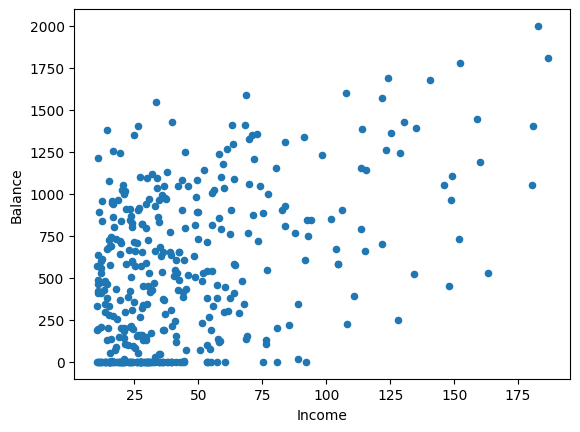

In [42]:
df.plot.scatter(x="Income",y="Balance")   

<Axes: >

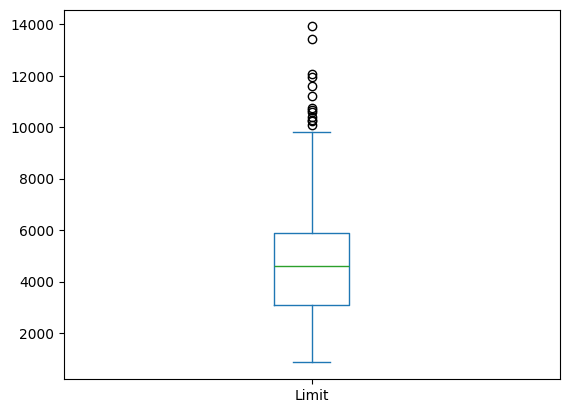

In [46]:
df["Limit"].plot.box()

<Axes: ylabel='Frequency'>

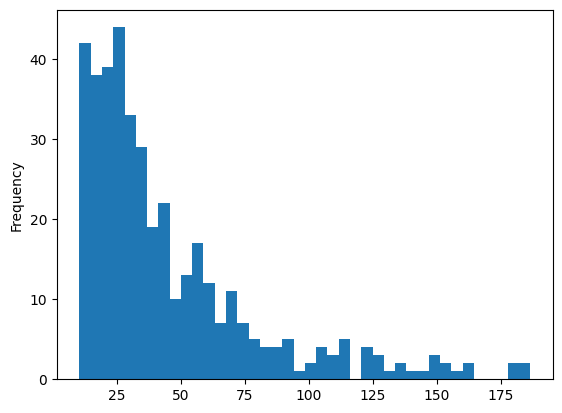

In [49]:
df["Income"].plot.hist(bins=40)

<Axes: >

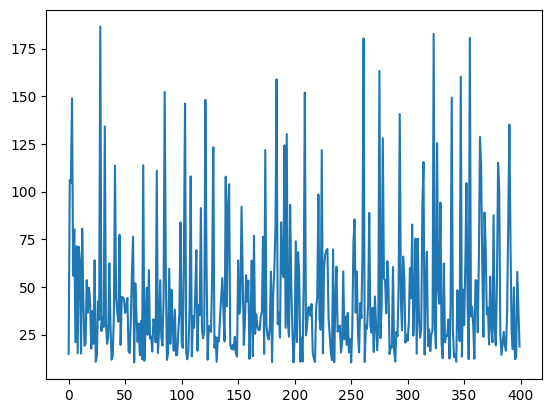

In [ ]:
df["Income"].plot.line()  # poco sensato

# Plotly express